In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [6]:
data = pd.read_csv("BostonHousing.csv")

In [7]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
# predicting 'medv' -> price of house

In [10]:
data.drop(['b'], axis=1, inplace=True) #b- black people, WTF

In [11]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [14]:
#null
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

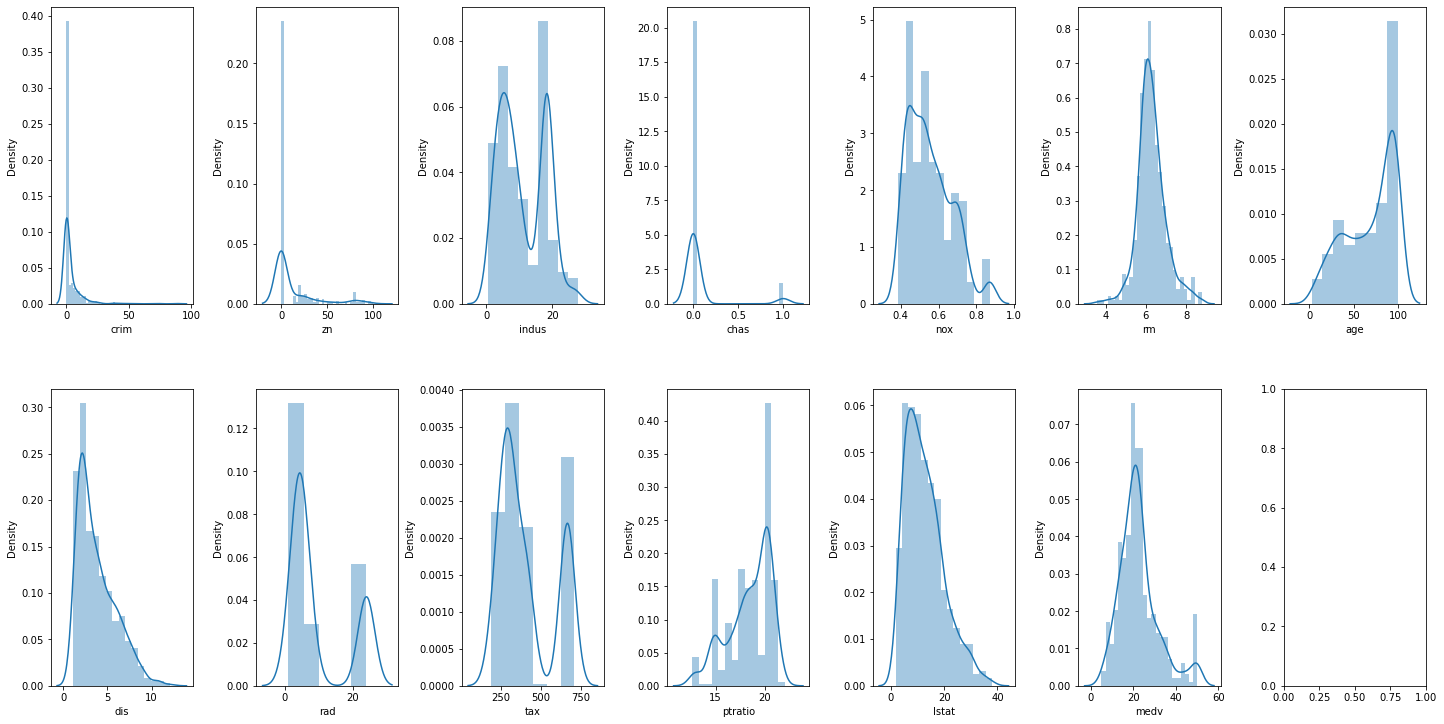

In [25]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### Min-Max Normalization for ['crim', 'zn', 'tax']

In [31]:
cols = ['crim', 'zn', 'tax'] #check graph, they are like category


for col in cols:
    # find minimum and maximum of that column
    minimum = min(data[col])
    maximum = max(data[col])
    data[col] = (data[col] - minimum) / (maximum - minimum)

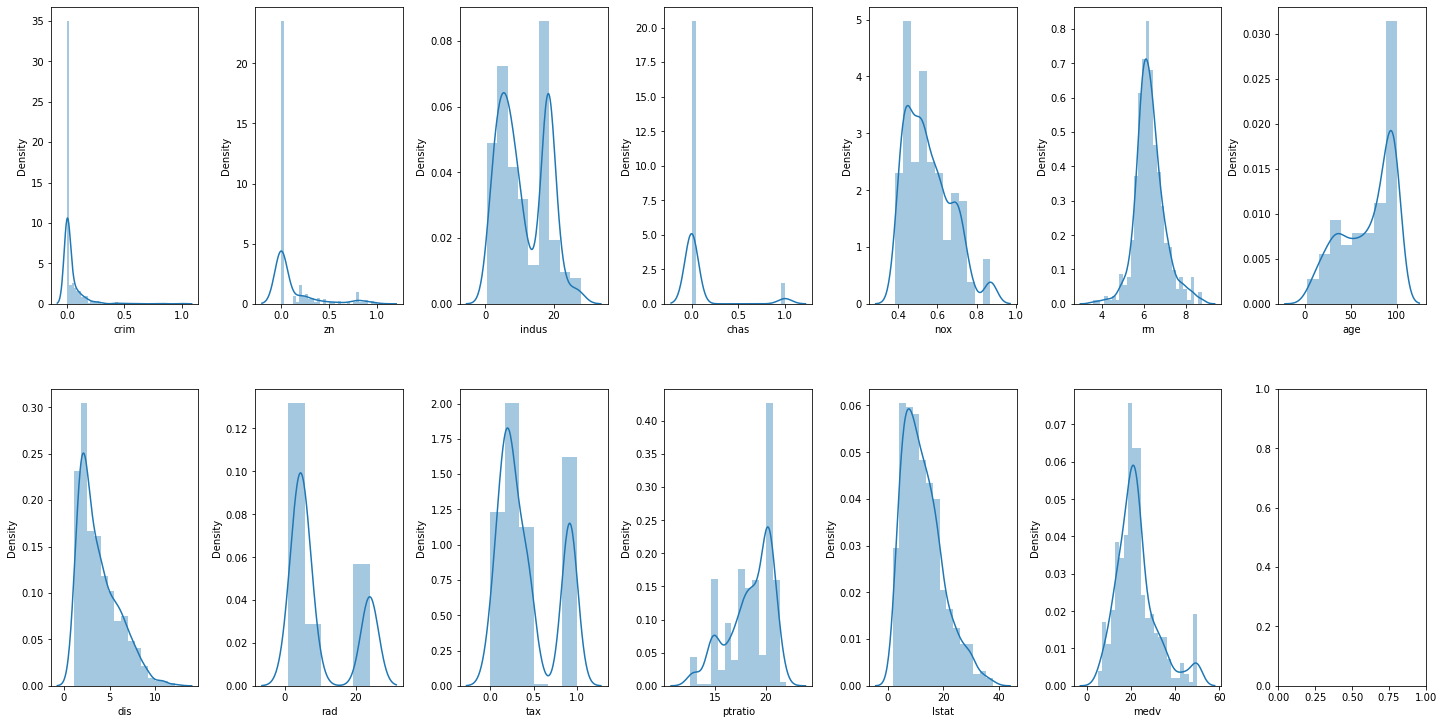

In [30]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


#NOW FOR THOSE COLUMNS, VALUE WILL BE IN RANGE OF 0 TO 1

In [32]:
# to make those colums to make uniform distribution, see lstat or medv

# standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(data[cols]) # cols id defined above
scaled_cols = pd.DataFrame(scaled_cols, columns=cols) 
scaled_cols.head()

,crim,zn,tax
0,-0.419782,0.284830,-0.666608
1,-0.417339,-0.487722,-0.987329
2,-0.417342,-0.487722,-0.987329
3,-0.416750,-0.487722,-1.106115
4,-0.412482,-0.487722,-1.106115


In [33]:
# put new three cols into data
for col in cols:
    data[col] = scaled_cols[col]

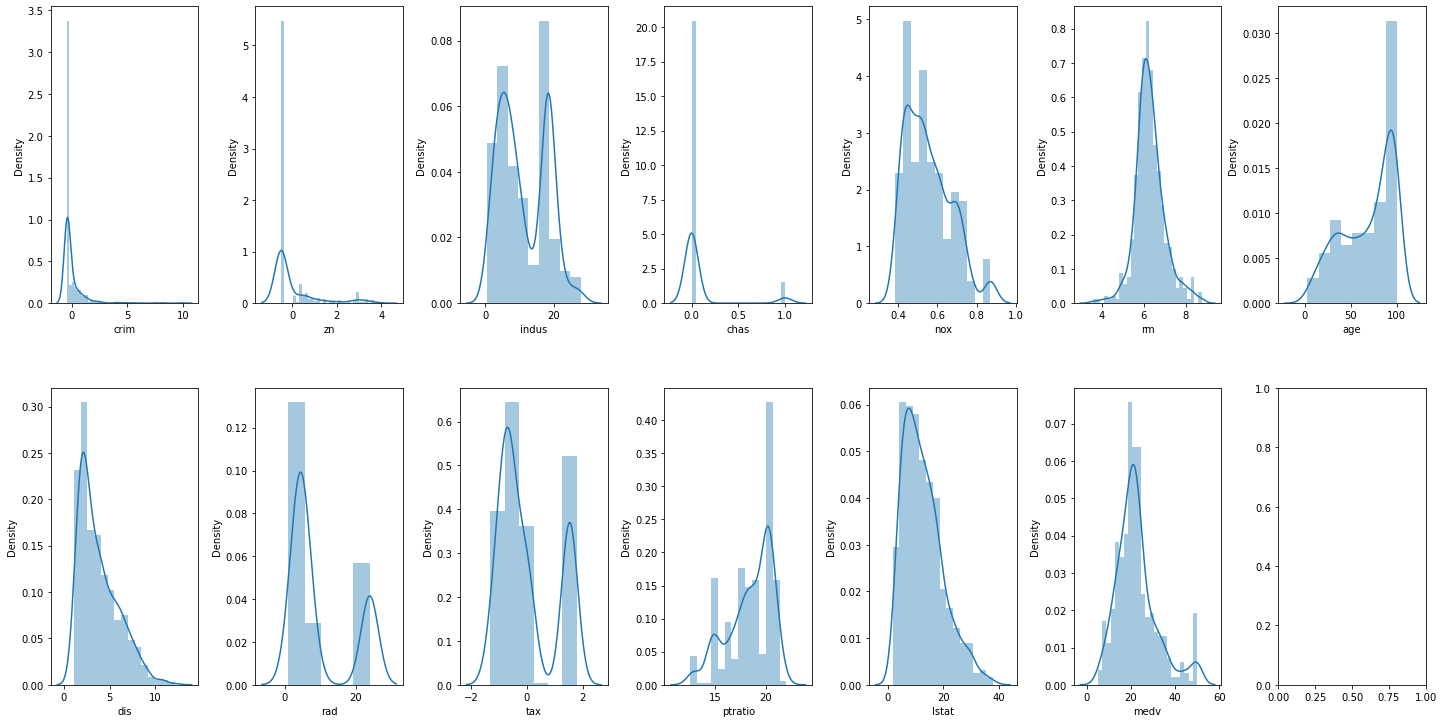

In [36]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

#CEHCK THE VALUES OF tax before and now

<AxesSubplot:>

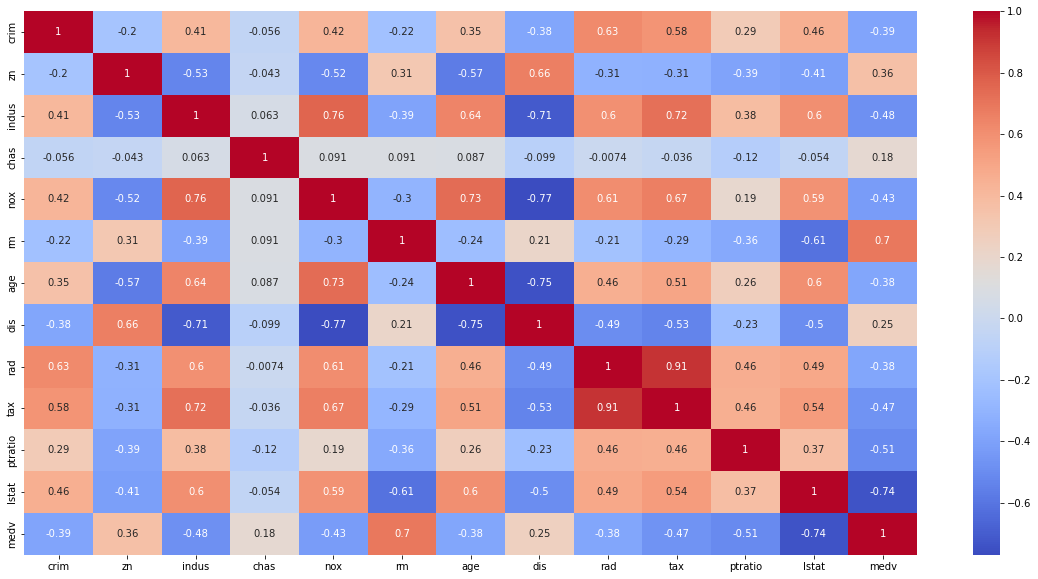

In [38]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

# more red: highly correlated parametrs (ith and jth)
# less red: less

In [48]:
# i am taking rm, zn,dis as they are highly co-related with medv
x = data[['rm', 'zn', 'dis']]
y = data['medv']

In [51]:
x.head()

,rm,zn,dis
0,6.575,0.284830,4.0900
1,6.421,-0.487722,4.9671
2,7.185,-0.487722,4.9671
3,6.998,-0.487722,6.0622
4,7.147,-0.487722,6.0622


In [52]:
x.shape

(506, 3)

In [55]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

### Training

In [60]:
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [63]:
# model evaluation for training set
y_train_predict = reg.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = reg.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6.780661529317343
R2 score is 0.4647676113779158


The model performance for testing set
--------------------------------------
RMSE is 5.011948873710599
R2 score is 0.6791622137418398


### Save as pickle

In [64]:
import pickle
pickle.dump(reg,open('model.pkl','wb'))